In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
schema = {
    # --- strings ------------------------------------------------------------
    "location":      "string",
    "type":          "string",
    "block":         "string",
    "street":        "string",
    "storey_range":  "string",   
    "flat_model":     "string",

    # --- numerics -----------------------------------------------------------
    "area_sqm":      "float64",
    "price":         "float64", 
    "commence_date": "Int64",   
    "Quantity_Index":"Int64",
}

In [13]:
data = pd.read_csv("../data.csv", parse_dates=["date"], dtype=schema, usecols=range(11))
data.dtypes

date             datetime64[ns]
location         string[python]
type             string[python]
block            string[python]
street           string[python]
storey_range     string[python]
area_sqm                float64
flat_model       string[python]
commence_date             Int64
Quality_Index             int64
price                   float64
dtype: object

In [14]:
data["year"] = data["date"].dt.year
data.dropna(subset=["price"], inplace=True)
data.drop(columns="date", inplace=True)

feature_cols = [
    "year",             
    "location",
    "type",
    "block",
    "street",
    "storey_range",
    "area_sqm",         
    "flat_model",
    "commence_date",     
    "Quality_Index"      
]

X = pd.get_dummies(data.drop(columns="price"), drop_first=True)
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test,  y_test_pred))
train_r2   = r2_score(y_train, y_train_pred)
test_r2    = r2_score(y_test,  y_test_pred)

print(f"Train RMSE : {train_rmse}")
print(f"Test  RMSE : {test_rmse}")
print(f"Train R²   : {train_r2}")
print(f"Test  R²   : {test_r2}")

Train RMSE : 2261.831242582935
Test  RMSE : 36314.98184070374
Train R²   : 0.9995928585697176
Test  R²   : 0.8947462673669064


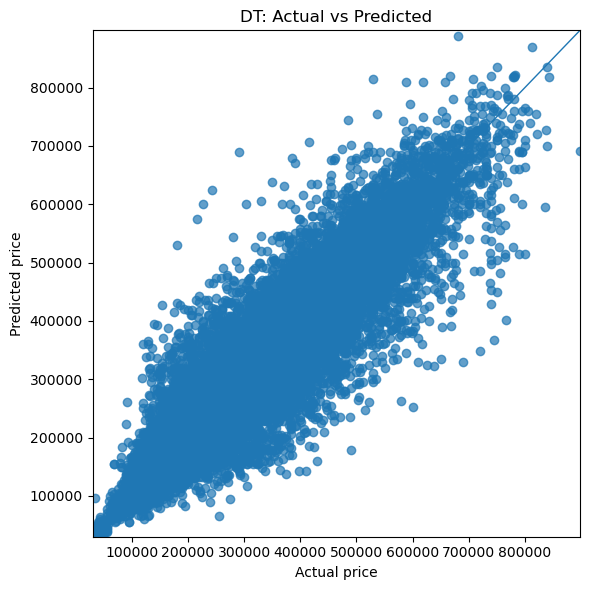

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)

lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.plot(lims, lims, linewidth=1)  
plt.xlim(lims)
plt.ylim(lims)

plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("DT: Actual vs Predicted")

plt.tight_layout()
plt.show()